## Task: Analyze customer support tickets to identify common issues and suggest solutions to improve response time.

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [15]:
# Loading dataset
file_path = "customer_support_tickets.csv"
df = pd.read_csv(file_path)

# Preprocess text
def preprocess_text(text):
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(str(text).lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return words

In [43]:
# Analyze common ticket issues
df['Processed Description'] = df['Ticket Type'].apply(preprocess_text) 
all_words = [word for desc in df['Processed Description'].dropna() for word in desc]
word_counts = Counter(all_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[

In [44]:
# Most common issues
common_issues = word_counts.most_common(10)
print("Most Common Issues:", common_issues)

Most Common Issues: [('request', 3447), ('inquiry', 3275), ('refund', 1752), ('technical', 1747), ('issue', 1747), ('cancellation', 1695), ('product', 1641), ('billing', 1634)]


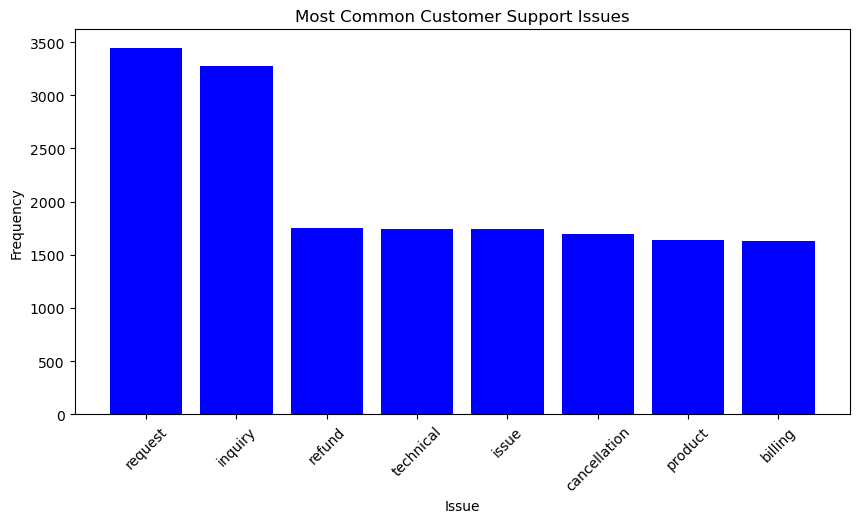

In [45]:
import matplotlib.pyplot as plt

# Ploting common issues
labels, values = zip(*common_issues)
plt.figure(figsize=(10,5))
plt.bar(labels, values, color='blue')
plt.xlabel('Issue')
plt.ylabel('Frequency')
plt.title('Most Common Customer Support Issues')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Analyzing resolution time and customer satisfaction
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Resolution Time (hours)'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600


In [28]:
# Average resolution time per ticket type
resolution_time_avg = df.groupby('Ticket Type')['Resolution Time (hours)'].mean().dropna()
print("Average Resolution Time Per Ticket Type:\n", resolution_time_avg)

Average Resolution Time Per Ticket Type:
 Ticket Type
Billing inquiry        -0.207813
Cancellation request   -0.165924
Product inquiry        -0.243183
Refund request          0.218037
Technical issue         0.066466
Name: Resolution Time (hours), dtype: float64


In [29]:
# Customer satisfaction by ticket type
satisfaction_avg = df.groupby('Ticket Type')['Customer Satisfaction Rating'].mean().dropna()
print("Average Customer Satisfaction Per Ticket Type:\n", satisfaction_avg)

Average Customer Satisfaction Per Ticket Type:
 Ticket Type
Billing inquiry         3.027574
Cancellation request    3.029070
Product inquiry         3.016886
Refund request          2.934564
Technical issue         2.958621
Name: Customer Satisfaction Rating, dtype: float64


In [32]:
from tabulate import tabulate  

# Define solutions based on common words  
solutions = {  
    'account': 'Improve self-service support for account-related queries.',  
    'assist': 'Enhance customer support training for better assistance.',  
    'data': 'Provide better data backup or recovery guides.',  
    'issue': 'Enhance troubleshooting documentation for frequently reported issues.',  
    'problem': 'Improve problem resolution workflow to reduce response time.',  
    'product': 'Offer detailed product guides and troubleshooting steps.',  
    'software': 'Provide clear setup and troubleshooting guides for software products.',  
}  

# Suggest solutions based on identified common words  
issue_solutions = {}  
for issue, _ in common_issues:  
    # Check if the issue word has a predefined solution, otherwise provide a generic response  
    matching_solution = None  
    for key in solutions.keys():  
        if key in issue:  # Check if the common issue contains a keyword  
            matching_solution = solutions[key]  
            break  
    issue_solutions[issue] = matching_solution if matching_solution else "General improvements in customer support process."  

# Tabulate results  
table = [[issue, solution] for issue, solution in issue_solutions.items()]  
print(tabulate(table, headers=["Common Issue", "Suggested Solution"], tablefmt="grid"))  


+----------------+-----------------------------------------------------------------------+
| Common Issue   | Suggested Solution                                                    |
+================+=======================================================================+
| request        | General improvements in customer support process.                     |
+----------------+-----------------------------------------------------------------------+
| inquiry        | General improvements in customer support process.                     |
+----------------+-----------------------------------------------------------------------+
| refund         | General improvements in customer support process.                     |
+----------------+-----------------------------------------------------------------------+
| technical      | General improvements in customer support process.                     |
+----------------+-----------------------------------------------------------------------+

In [34]:
# Recommendations to provide
print("Recommendations:")
print("1. Prioritize ticket types with high resolution times for process improvements.")
print("2. Automate common issues to reduce handling time.")
print("3. Focus on low-rated issues to improve customer satisfaction.")

Recommendations:
1. Prioritize ticket types with high resolution times for process improvements.
2. Automate common issues to reduce handling time.
3. Focus on low-rated issues to improve customer satisfaction.
